<a href="https://colab.research.google.com/github/dsinsight/iid/blob/main/IID_Non_IID_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Python Implementation: Comparing Performance with and without IID Assumption**

###**Step 1: Data Generation and Visualization**

###**Importing Libraries**
~~~
import numpy as np
~~~
This line imports the numpy library and gives it a shorter name (np). numpy is a powerful library for working with numerical data in Python, especially arrays.
~~~
import matplotlib.pyplot as pl
~~~
This line imports the pyplot module from the matplotlib library and gives it a shorter name (plt). matplotlib is a popular library for creating visualizations in Python, like plots and charts.
~~~
np.random.seed(42)
~~~
This line sets the random seed for numpy's random number generator. By setting a seed, we ensure that the random numbers generated are the same every time the code is run. This is important for reproducibility, so others can get the same results when they run your code.

###**Generating Data**

~~~
n_samples = 1000:
~~~
This line sets the number of data points to generate (1000 in this case).
~~~
mu, sigma = 0, 1:
~~~
These lines define the mean (mu) and standard deviation (sigma) for the normal distribution.
~~~
iid_data = np.random.normal(mu, sigma, n_samples):
~~~
This line generates n_samples random data points from a normal distribution with the specified mu and sigma. This data is considered IID (Independent and Identically Distributed) because each data point is drawn independently from the same distribution.
~~~
non_iid_data = np.random.normal(mu, sigma, n_samples) + np.linspace(-2, 2, n_samples):
~~~
This line generates non-IID data. It starts with the same normal distribution as before, but then adds a linear trend using np.linspace(-2, 2, n_samples). This trend makes the data points dependent on their position in the sequence, violating the independence assumption of IID.


###**Plotting the Data**

~~~
plt.figure(figsize=(12, 6)):
~~~
This line creates a new figure for the plot with a specific size (12 inches wide, 6 inches tall).
~~~
plt.subplot(1, 2, 1):
~~~
This line creates a subplot within the figure. (1, 2, 1) means we are creating a 1x2 grid of subplots and this is the first subplot.
~~~
plt.hist(...):
~~~
This line creates a histogram of the iid_data.
~~~
bins=30:
~~~
Divides the data into 30 bins for the histogram.
~~~
alpha=0.7:
~~~
Sets the transparency of the bars.
~~~
color='blue':
~~~
Sets the color of the bars to blue.
~~~
edgecolor='black':
~~~
Sets the color of the bar edges to black.
~~~
plt.title(...), plt.xlabel(...), plt.ylabel(...):
~~~
These lines set the title, x-axis label, and y-axis label for the subplot. The code then repeats the process to create a second subplot for the non_iid_data.
~~~
plt.tight_layout():
~~~
This line adjusts the spacing between subplots to prevent overlapping



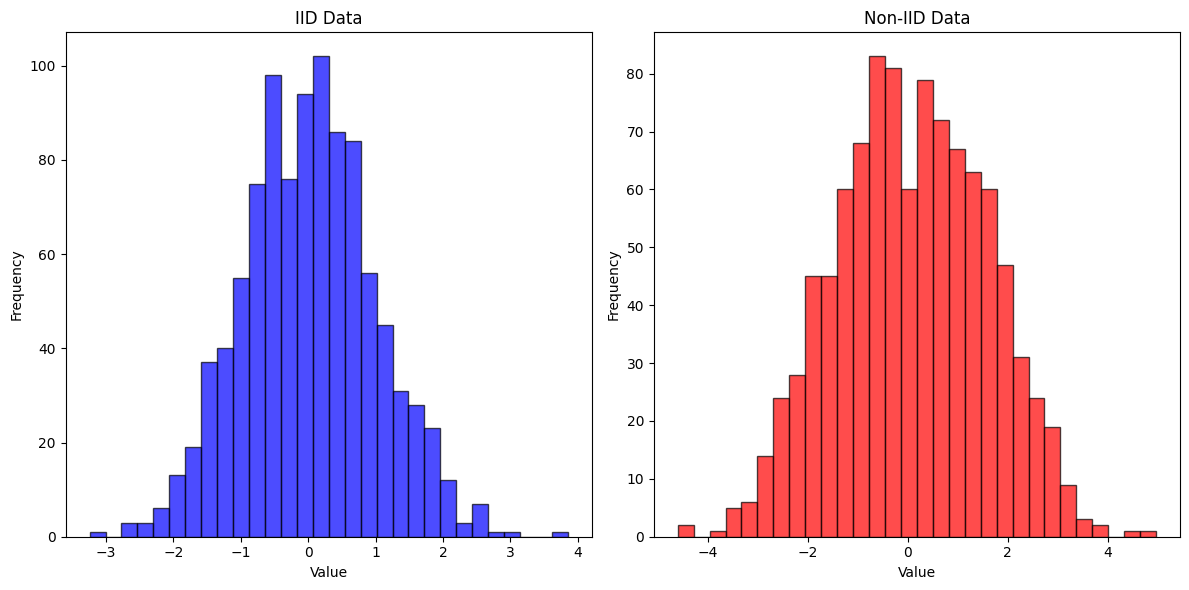

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Generate IID data (normal distribution)
n_samples = 1000
mu, sigma = 0, 1
iid_data = np.random.normal(mu, sigma, n_samples)

# Generate non-IID data (with a trend)
non_iid_data = np.random.normal(mu, sigma, n_samples) + np.linspace(-2, 2, n_samples)

# Plot distributions
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(iid_data, bins=30, alpha=0.7, color='blue', edgecolor='black')
plt.title('IID Data')
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(non_iid_data, bins=30, alpha=0.7, color='red', edgecolor='black')
plt.title('Non-IID Data')
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

###**Step 2: Statistical Tests for IID**


###**Importing Necessary Functions**

~~~
from scipy.stats import kstest, pearsonr
~~~
This line imports two specific functions, kstest and pearsonr, from the scipy.stats library.

- kstest is used to perform the Kolmogorov-Smirnov test, which helps us check if a dataset follows a specific distribution (in this case, the normal distribution).
- pearsonr is used to calculate the Pearson correlation coefficient, which measures the linear relationship between two datasets. This will help us assess the independence of the data points.

###**Kolmogorov-Smirnov Test for Normality**

~~~
# Kolmogorov-Smirnov Test for normality (IID criteria)
kst_iid = kstest(iid_data, 'norm')
kst_non_iid = kstest(non_iid_data, 'norm')
~~~
These lines perform the Kolmogorov-Smirnov test on both the iid_data and the non_iid_data.
- kstest(iid_data, 'norm') applies the test to iid_data to see if it follows a normal distribution ('norm'). The results are stored in the variable kst_iid.
- kstest(non_iid_data, 'norm') does the same for the non_iid_data, storing results in kst_non_iid.

This test is related to the IID assumption because data that is truly IID is often expected to follow a specific theoretical distribution, like the normal distribution in this case.

###**Autocorrelation Test for Independence**

~~~
# Autocorrelation test for independence
autocorr_iid = pearsonr(iid_data[:-1], iid_data[1:])[0]
autocorr_non_iid = pearsonr(non_iid_data[:-1], non_iid_data[1:])[0]
~~~
Here, we're using the pearsonr function to check for autocorrelation, which essentially tells us if there's a relationship between a data point and the data point that comes before it. High autocorrelation suggests a lack of independence.

- pearsonr(iid_data[:-1], iid_data[1:])[0] calculates the correlation between each data point in iid_data and the one immediately preceding it. [:-1] selects all but the last element, and [1:] selects all but the first element, ensuring we are comparing consecutive data points. The [0] at the end extracts only the correlation coefficient from the function's output. The result is stored in autocorr_iid.
- pearsonr(non_iid_data[:-1], non_iid_data[1:])[0] does the same for the non_iid_data, and the result is stored in autocorr_non_iid.

###**Displaying the Results**

~~~
print("IID Data KS Test:", kst_iid)
print("Non-IID Data KS Test:", kst_non_iid)
print("IID Data Autocorrelation:", autocorr_iid)
print("Non-IID Data Autocorrelation:", autocorr_non_iid)
~~~
- These lines simply print the results of the tests to the console. This allows us to see the outcome of the Kolmogorov-Smirnov test and the autocorrelation test for both the IID and non-IID data.

This code snippet assess whether the generated data sets (iid_data and non_iid_data) meet the criteria for being IID (Independent and Identically Distributed) by testing for normality and independence.





In [4]:
from scipy.stats import kstest, pearsonr

# Kolmogorov-Smirnov Test for normality (IID criteria)
kst_iid = kstest(iid_data, 'norm')
kst_non_iid = kstest(non_iid_data, 'norm')

# Autocorrelation test for independence
autocorr_iid = pearsonr(iid_data[:-1], iid_data[1:])[0]
autocorr_non_iid = pearsonr(non_iid_data[:-1], non_iid_data[1:])[0]

print("IID Data KS Test:", kst_iid)
print("Non-IID Data KS Test:", kst_non_iid)
print("IID Data Autocorrelation:", autocorr_iid)
print("Non-IID Data Autocorrelation:", autocorr_non_iid)

IID Data KS Test: KstestResult(statistic=0.017327787320720822, pvalue=0.9196626608357358, statistic_location=-0.07444591576616721, statistic_sign=-1)
Non-IID Data KS Test: KstestResult(statistic=0.1388539115168259, pvalue=2.7867598328900075e-17, statistic_location=1.1209898639296418, statistic_sign=-1)
IID Data Autocorrelation: -0.007480130657425096
Non-IID Data Autocorrelation: 0.5554347895879019


###**Step 3: Model Application and Evaluation**



###**Importing Libraries**
~~~
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
~~~

- from sklearn.linear_model import LinearRegression: This imports the LinearRegression class, which is used to create a linear regression model.
- from sklearn.model_selection import train_test_split: This imports the train_test_split function, used to divide data into training and testing sets.
- from sklearn.metrics import mean_squared_error: This imports the mean_squared_error function, used to evaluate the model's performance.

###**Defining fit_and_evaluate Function**
~~~
def fit_and_evaluate(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = LinearRegression()
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    return mean_squared_error(y_test, predictions)
~~~
This function takes your data (X for features, y for target) and does the following:

- Splits the data: train_test_split divides the data into 80% for training (X_train, y_train) and 20% for testing (X_test, y_test). random_state=42 ensures the split is the same each time for reproducibility.
- Creates and trains a model: model = LinearRegression() creates a linear regression model, and model.fit(X_train, y_train) trains it using the training data.
- Makes predictions: predictions = model.predict(X_test) uses the trained model to predict values for the test data.
- Evaluates performance: mean_squared_error(y_test, predictions) calculates the mean squared error, a measure of how well the predictions match the actual values, and returns this error.

###**Generating Data with the Model**

~~~
#Generate features and targets
X_iid = np.random.rand(n_samples, 1) * 10
y_iid = 3 * X_iid.squeeze() + np.random.normal(0, 1, n_samples)

X_non_iid = np.random.rand(n_samples, 1) * 10
y_non_iid = 3 * X_non_iid.squeeze() + np.linspace(-5, 5, n_samples) + np.random.normal(0, 1, n_samples)
~~~

- X_iid and X_non_iid: These lines create feature data using np.random.rand. They are essentially random numbers between 0 and 10.
- y_iid: This line creates target data for the IID case. It's based on X_iid with some added random noise (np.random.normal). It represents a linear relationship.
- y_non_iid: This line creates target data for the non-IID case. It's similar to y_iid but includes an additional trend (np.linspace) that makes the data points not identically distributed.


###**Evaluating Data with the Model**

~~~
# Evaluate models
mse_iid = fit_and_evaluate(X_iid, y_iid)
mse_non_iid = fit_and_evaluate(X_non_iid, y_non_iid)
~~~

- mse_iid = fit_and_evaluate(X_iid, y_iid): This line uses the fit_and_evaluate function to train and evaluate a linear regression model on the IID data, storing the mean squared error in mse_iid.
- mse_non_iid = fit_and_evaluate(X_non_iid, y_non_iid): This does the same for the non-IID data, storing the error in mse_non_iid.

###**Printing Results**
~~~
print(f"Mean Squared Error for IID Data: {mse_iid}")
print(f"Mean Squared Error for Non-IID Data: {mse_non_iid}")
~~~
- These lines print the calculated mean squared errors for both the IID and non-IID cases



In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

def fit_and_evaluate(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = LinearRegression()
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    return mean_squared_error(y_test, predictions)

# Generate features and targets
X_iid = np.random.rand(n_samples, 1) * 10
y_iid = 3 * X_iid.squeeze() + np.random.normal(0, 1, n_samples)

X_non_iid = np.random.rand(n_samples, 1) * 10
y_non_iid = 3 * X_non_iid.squeeze() + np.linspace(-5, 5, n_samples) + np.random.normal(0, 1, n_samples)

# Evaluate models
mse_iid = fit_and_evaluate(X_iid, y_iid)
mse_non_iid = fit_and_evaluate(X_non_iid, y_non_iid)

print(f"Mean Squared Error for IID Data: {mse_iid}")
print(f"Mean Squared Error for Non-IID Data: {mse_non_iid}")

Mean Squared Error for IID Data: 1.0092953045433648
Mean Squared Error for Non-IID Data: 9.648951439255994
